

 ####



### 1.CSV to DataFrame###

In [1]:
import pandas as pd

# CSV  to DataFrame
expense_categories = pd.read_csv("ExpenseCategories.csv")
expenses           = pd.read_csv("Expenses.csv")
hotels             = pd.read_csv("Hotels.csv")
room_pricing       = pd.read_csv("RoomPricing.csv")
room_types         = pd.read_csv("RoomTypes.csv")
rooms              = pd.read_csv("Rooms.csv")
services           = pd.read_csv("Services.csv")


###2.Converting some variables to dates and numerical values###

In [8]:
# التواريخ
expenses["ExpenseDate"] = pd.to_datetime(expenses["ExpenseDate"])
room_pricing["StartDate"]    = pd.to_datetime(room_pricing["StartDate"])
room_pricing["EndDate"]      = pd.to_datetime(room_pricing["EndDate"])

# القيم العددية
expenses["Amount"] = pd.to_numeric(expenses["Amount"], errors="coerce")
room_pricing["Price"]   = pd.to_numeric(room_pricing["Price"], errors="coerce")
room_types["Capacity"] = pd.to_numeric(room_types["Capacity"], errors="coerce")
services["BasePrice"]  = pd.to_numeric(services["BasePrice"], errors="coerce")

###3.Dataset profiling for hotel management data

###Exploratory data summary for hotel CSV files###

###Automatic overview of hotel datasets in Pandas###

In [13]:
from IPython.display import display
import pandas as pd

datasets = {
    "expenses_cat": expense_categories,
    "expenses": expenses,
    "pricing": room_pricing,
    "rooms": rooms,
    "room_types": room_types,
    "services": services,
    "hotels": hotels
}

for name, df in datasets.items():
    print("\n" + "="*80)
    print(f"Dataset: {name}")
    print("="*80)

    # 1) Shape
    print("\n[1] Shape")
    shape_df = pd.DataFrame(
        {"n_rows": [df.shape[0]], "n_columns": [df.shape[1]]}
    )
    display(shape_df)

    # 2) Columns and dtypes
    print("\n[2] Columns and dtypes")
    columns_df = pd.DataFrame({
        "column": df.columns,
        "dtype": df.dtypes.values
    })
    display(columns_df)

    # 3) First 5 rows
    print("\n[3] First 5 rows")
    display(df.head())

    # 4) Last 5 rows
    print("\n[4] Last 5 rows")
    display(df.tail())

    # 5) Descriptive statistics
    print("\n[5] Descriptive statistics (numeric and non-numeric)")
    desc_df = df.describe(include="all").transpose()
    display(desc_df)

    # 6) Missing values
    print("\n[6] Missing values per column")
    missing_df = pd.DataFrame({
        "column": df.columns,
        "missing_count": df.isnull().sum().values
    })
    display(missing_df)

    # 7) Info summary as a small table
    print("\n[7] Info summary")
    info_summary = pd.DataFrame({
        "n_rows": [df.shape[0]],
        "n_columns": [len(df.columns)],
        "memory_usage_bytes": [df.memory_usage(deep=True).sum()]
    })
    display(info_summary)



Dataset: expenses_cat

[1] Shape


,n_rows,n_columns
0,10,2



[2] Columns and dtypes


,column,dtype
0,ExpenseCategoryID,int64
1,CategoryName,object



[3] First 5 rows


,ExpenseCategoryID,CategoryName
0,1,Salaries & Wages
1,2,Utilities
2,3,Marketing & Advertising
3,4,Maintenance & Repairs
4,5,Food & Beverage Costs



[4] Last 5 rows


,ExpenseCategoryID,CategoryName
5,6,Cleaning Supplies
6,7,Insurance
7,8,Technology & Software
8,9,Training & Development
9,10,Administrative Expenses



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ExpenseCategoryID,10.0,NaN,NaN,NaN,5.5,3.02765,1.0,3.25,5.5,7.75,10.0
CategoryName,10,10,Salaries & Wages,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[6] Missing values per column


,column,missing_count
0,ExpenseCategoryID,0
1,CategoryName,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,10,2,884



Dataset: expenses

[1] Shape


,n_rows,n_columns
0,2144,9



[2] Columns and dtypes


,column,dtype
0,ExpenseID,int64
1,HotelID,int64
2,ExpenseCategoryID,int64
3,ExpenseDate,datetime64[ns]
4,Description,object
5,Amount,float64
6,VendorName,object
7,PaymentMethod,object
8,Status,object



[3] First 5 rows


,ExpenseID,HotelID,ExpenseCategoryID,ExpenseDate,Description,Amount,VendorName,PaymentMethod,Status
0,1,1,1,2020-01-06,Bonus payments,65166.72,Municipal Water Authority,Check,Paid
1,2,1,1,2020-01-13,Overtime payments,96362.77,Tech Solutions,Check,Pending
2,3,1,1,2020-01-10,Overtime payments,127839.94,Tech Solutions,Credit Card,Paid
3,4,1,2,2020-01-11,Telecommunications,21639.68,Elevator Tech,Check,Paid
4,5,1,2,2020-01-02,Telecommunications,22172.52,Sanitech Co.,Credit Card,Paid



[4] Last 5 rows


,ExpenseID,HotelID,ExpenseCategoryID,ExpenseDate,Description,Amount,VendorName,PaymentMethod,Status
2139,2140,1,9,2025-12-02,Certification courses,670.35,Marketing Solutions Ltd.,Credit Card,Paid
2140,2141,1,9,2025-12-24,Training materials,1736.38,Employee Benefits Co.,Bank Transfer,Paid
2141,2142,1,10,2025-12-11,Accounting services,5574.18,Software Corp.,Bank Transfer,Paid
2142,2143,1,10,2025-12-09,Bank charges,3791.62,Legal Associates,Cash,Paid
2143,2144,1,10,2025-12-06,Office supplies,6403.00,Municipal Water Authority,Bank Transfer,Pending



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ExpenseID,2144.0,NaN,NaN,NaN,1072.5,1.0,536.75,1072.5,1608.25,2144.0,619.063809
HotelID,2144.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
ExpenseCategoryID,2144.0,NaN,NaN,NaN,5.547108,1.0,3.0,6.0,8.0,10.0,2.878893
ExpenseDate,2144,NaN,NaN,NaN,2022-12-31 15:34:55.522387968,2020-01-01 00:00:00,2021-06-21 00:00:00,2022-12-27 00:00:00,2024-07-10 00:00:00,2025-12-28 00:00:00,NaN
Description,2144,40,Equipment insurance,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,2144.0,NaN,NaN,NaN,16912.395868,500.95,3507.0025,6597.755,12884.005,148879.47,29446.099392
VendorName,2144,36,Tech Solutions,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,2144,4,Credit Card,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,2144,3,Paid,1813,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[6] Missing values per column


,column,missing_count
0,ExpenseID,0
1,HotelID,0
2,ExpenseCategoryID,0
3,ExpenseDate,0
4,Description,0
5,Amount,0
6,VendorName,0
7,PaymentMethod,0
8,Status,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,2144,9,607566



Dataset: pricing

[1] Shape


,n_rows,n_columns
0,360,6



[2] Columns and dtypes


,column,dtype
0,PricingID,int64
1,RoomTypeID,int64
2,StartDate,datetime64[ns]
3,EndDate,datetime64[ns]
4,Price,float64
5,Currency,object



[3] First 5 rows


,PricingID,RoomTypeID,StartDate,EndDate,Price,Currency
0,1,1,2020-01-01,2020-01-31,125.50,USD
1,2,2,2020-01-01,2020-01-31,186.24,USD
2,3,3,2020-01-01,2020-01-31,263.24,USD
3,4,4,2020-01-01,2020-01-31,386.27,USD
4,5,5,2020-01-01,2020-01-31,705.98,USD



[4] Last 5 rows


,PricingID,RoomTypeID,StartDate,EndDate,Price,Currency
355,356,1,2025-12-01,2025-12-31,126.41,USD
356,357,2,2025-12-01,2025-12-31,168.04,USD
357,358,3,2025-12-01,2025-12-31,245.15,USD
358,359,4,2025-12-01,2025-12-31,440.83,USD
359,360,5,2025-12-01,2025-12-31,664.49,USD



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
PricingID,360.0,NaN,NaN,NaN,180.5,1.0,90.75,180.5,270.25,360.0,104.067286
RoomTypeID,360.0,NaN,NaN,NaN,3.0,1.0,2.0,3.0,4.0,5.0,1.416182
StartDate,360,NaN,NaN,NaN,2022-12-16 06:40:00,2020-01-01 00:00:00,2021-06-23 12:00:00,2022-12-16 12:00:00,2024-06-08 12:00:00,2025-12-01 00:00:00,NaN
EndDate,360,NaN,NaN,NaN,2023-01-14 17:20:00,2020-01-31 00:00:00,2021-07-23 06:00:00,2023-01-15 12:00:00,2024-07-07 18:00:00,2025-12-31 00:00:00,NaN
Price,360.0,NaN,NaN,NaN,326.7535,74.04,156.535,227.105,449.5275,921.53,219.129874
Currency,360,1,USD,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[6] Missing values per column


,column,missing_count
0,PricingID,0
1,RoomTypeID,0
2,StartDate,0
3,EndDate,0
4,Price,0
5,Currency,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,360,6,33252



Dataset: rooms

[1] Shape


,n_rows,n_columns
0,180,6



[2] Columns and dtypes


,column,dtype
0,RoomID,int64
1,HotelID,int64
2,RoomNumber,int64
3,RoomTypeID,int64
4,Status,object
5,FloorNumber,int64



[3] First 5 rows


,RoomID,HotelID,RoomNumber,RoomTypeID,Status,FloorNumber
0,1,1,101,1,Available,1
1,2,1,102,1,Available,1
2,3,1,103,1,Available,1
3,4,1,104,1,Available,1
4,5,1,105,1,Available,1



[4] Last 5 rows


,RoomID,HotelID,RoomNumber,RoomTypeID,Status,FloorNumber
175,176,1,916,5,Available,9
176,177,1,917,5,Available,9
177,178,1,918,5,Available,9
178,179,1,919,5,Available,9
179,180,1,920,5,Available,9



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RoomID,180.0,NaN,NaN,NaN,90.5,52.105662,1.0,45.75,90.5,135.25,180.0
HotelID,180.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
RoomNumber,180.0,NaN,NaN,NaN,510.5,258.983671,101.0,305.75,510.5,715.25,920.0
RoomTypeID,180.0,NaN,NaN,NaN,2.361111,1.007036,1.0,2.0,2.0,3.0,5.0
Status,180,4,Available,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FloorNumber,180.0,NaN,NaN,NaN,5.0,2.589191,1.0,3.0,5.0,7.0,9.0



[6] Missing values per column


,column,missing_count
0,RoomID,0
1,HotelID,0
2,RoomNumber,0
3,RoomTypeID,0
4,Status,0
5,FloorNumber,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,180,6,17710



Dataset: room_types

[1] Shape


,n_rows,n_columns
0,5,4



[2] Columns and dtypes


,column,dtype
0,RoomTypeID,int64
1,TypeName,object
2,Description,object
3,Capacity,int64



[3] First 5 rows


,RoomTypeID,TypeName,Description,Capacity
0,1,Standard Single,Comfortable single room with city view,1
1,2,Standard Double,Standard double room with balcony,2
2,3,Deluxe Double,Deluxe double room with sea view and premium a...,2
3,4,Junior Suite,Junior suite with separate living area and sea...,4
4,5,Presidential Suite,Luxurious presidential suite with panoramic se...,6



[4] Last 5 rows


,RoomTypeID,TypeName,Description,Capacity
0,1,Standard Single,Comfortable single room with city view,1
1,2,Standard Double,Standard double room with balcony,2
2,3,Deluxe Double,Deluxe double room with sea view and premium a...,2
3,4,Junior Suite,Junior suite with separate living area and sea...,4
4,5,Presidential Suite,Luxurious presidential suite with panoramic se...,6



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RoomTypeID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
TypeName,5,5,Standard Single,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,5,5,Comfortable single room with city view,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity,5.0,NaN,NaN,NaN,3.0,2.0,1.0,2.0,2.0,4.0,6.0



[6] Missing values per column


,column,missing_count
0,RoomTypeID,0
1,TypeName,0
2,Description,0
3,Capacity,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,5,4,1024



Dataset: services

[1] Shape


,n_rows,n_columns
0,15,7



[2] Columns and dtypes


,column,dtype
0,ServiceID,int64
1,ServiceName,object
2,Description,object
3,BasePrice,int64
4,ServiceType,object
5,IsChargeable,object
6,UnitOfMeasure,object



[3] First 5 rows


,ServiceID,ServiceName,Description,BasePrice,ServiceType,IsChargeable,UnitOfMeasure
0,1,Restaurant - Breakfast,Buffet breakfast service,25,F&B,Yes,per person
1,2,Restaurant - Lunch,À la carte lunch menu,35,F&B,Yes,per person
2,3,Restaurant - Dinner,Fine dining dinner service,55,F&B,Yes,per person
3,4,Room Service,24-hour in-room dining service,0,F&B,Yes,per order
4,5,Bar Service,Premium bar and cocktail service,0,F&B,Yes,per drink



[4] Last 5 rows


,ServiceID,ServiceName,Description,BasePrice,ServiceType,IsChargeable,UnitOfMeasure
10,11,Airport Transfer,Airport pickup and drop-off,30,Transportation,Yes,per trip
11,12,City Tour,Guided tours of local attractions,50,Recreation,Yes,per person
12,13,Babysitting,Professional childcare service,20,Guest Service,Yes,per hour
13,14,Business Center,Meeting rooms and business facilities,15,Business,Yes,per hour
14,15,Car Rental,Vehicle rental service,45,Transportation,Yes,per day



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ServiceID,15.0,NaN,NaN,NaN,8.0,4.472136,1.0,4.5,8.0,11.5,15.0
ServiceName,15,15,Restaurant - Breakfast,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,15,15,Buffet breakfast service,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BasePrice,15.0,NaN,NaN,NaN,29.666667,24.013885,0.0,12.5,25.0,47.5,80.0
ServiceType,15,7,F&B,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsChargeable,15,1,Yes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitOfMeasure,15,8,per person,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[6] Missing values per column


,column,missing_count
0,ServiceID,0
1,ServiceName,0
2,Description,0
3,BasePrice,0
4,ServiceType,0
5,IsChargeable,0
6,UnitOfMeasure,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,15,7,5017



Dataset: hotels

[1] Shape


,n_rows,n_columns
0,1,8



[2] Columns and dtypes


,column,dtype
0,HotelID,int64
1,Name,object
2,Address,object
3,City,object
4,Country,object
5,StarRating,int64
6,NumberOfRooms,int64
7,ChainName,object



[3] First 5 rows


,HotelID,Name,Address,City,Country,StarRating,NumberOfRooms,ChainName
0,1,Steigenberger Hotel El Lessan,"Corniche Road, New Damietta",Damietta,Egypt,5,180,Steigenberger Hotels AG



[4] Last 5 rows


,HotelID,Name,Address,City,Country,StarRating,NumberOfRooms,ChainName
0,1,Steigenberger Hotel El Lessan,"Corniche Road, New Damietta",Damietta,Egypt,5,180,Steigenberger Hotels AG



[5] Descriptive statistics (numeric and non-numeric)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HotelID,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Name,1,1,Steigenberger Hotel El Lessan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,1,1,"Corniche Road, New Damietta",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1,1,Damietta,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1,1,Egypt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StarRating,1.0,NaN,NaN,NaN,5.0,NaN,5.0,5.0,5.0,5.0,5.0
NumberOfRooms,1.0,NaN,NaN,NaN,180.0,NaN,180.0,180.0,180.0,180.0,180.0
ChainName,1,1,Steigenberger Hotels AG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN



[6] Missing values per column


,column,missing_count
0,HotelID,0
1,Name,0
2,Address,0
3,City,0
4,Country,0
5,StarRating,0
6,NumberOfRooms,0
7,ChainName,0



[7] Info summary


,n_rows,n_columns,memory_usage_bytes
0,1,8,493


##4. Joining tables to build a data model##

###4.1.إضافة اسم فئة المصروف وبيانات الفندق لكل مصروف###

In [15]:
# ربط المصروفات مع فئاتها
expenses_full = expenses.merge(
    expense_categories,
    on="ExpenseCategoryID",
    how="left"
)

# ربط المصروفات مع جدول الفنادق
expenses_full = expenses_full.merge(
    hotels[["HotelID", "Name", "City", "Country"]],
    on="HotelID",
    how="left",
    suffixes=("", "_Hotel")
)

###4.2.ربط الغرف بأنواع الغرف وبالفندق###

In [16]:
rooms_full = rooms.merge(
    room_types,
    on="RoomTypeID",
    how="left"
).merge(
    hotels[["HotelID", "Name", "City", "Country", "StarRating"]],
    on="HotelID",
    how="left"
)


###4.3.ربط أسعار الغرف بأنواع الغرف:###

In [18]:
pricing_full = room_pricing.merge(
    room_types[["RoomTypeID", "TypeName", "Capacity"]],
    on="RoomTypeID",
    how="left"
)

##5.Analytical questions##

###5.1.إجمالي مصروفات كل فندق###

In [19]:
expenses_by_hotel = expenses_full.groupby("Name")["Amount"].sum().reset_index()
print(expenses_by_hotel.sort_values("Amount", ascending=False))


                            Name       Amount
0  Steigenberger Hotel El Lessan  36260176.74


###5.2.إجمالي المصروفات حسب الفئة###

In [20]:
expenses_by_cat = expenses_full.groupby("CategoryName")["Amount"].sum().reset_index()
print(expenses_by_cat.sort_values("Amount", ascending=False))


              CategoryName       Amount
6         Salaries & Wages  21145376.85
2    Food & Beverage Costs   4110479.03
9                Utilities   3164879.82
5  Marketing & Advertising   1795324.13
3                Insurance   1706142.68
4    Maintenance & Repairs   1163082.86
7    Technology & Software   1101072.80
0  Administrative Expenses    991114.32
1        Cleaning Supplies    707640.71
8   Training & Development    375063.54


###5.3.مصروفات شهرية لكل فندق###

In [21]:
expenses_full["YearMonth"] = expenses_full["ExpenseDate"].dt.to_period("M")
monthly_expenses_hotel = expenses_full.groupby(["Name", "YearMonth"])["Amount"].sum().reset_index()
print(monthly_expenses_hotel)


                             Name YearMonth     Amount
0   Steigenberger Hotel El Lessan   2020-01  488714.54
1   Steigenberger Hotel El Lessan   2020-02  572853.67
2   Steigenberger Hotel El Lessan   2020-03  648861.17
3   Steigenberger Hotel El Lessan   2020-04  517541.88
4   Steigenberger Hotel El Lessan   2020-05  521284.45
..                            ...       ...        ...
67  Steigenberger Hotel El Lessan   2025-08  468774.64
68  Steigenberger Hotel El Lessan   2025-09  423276.70
69  Steigenberger Hotel El Lessan   2025-10  565362.78
70  Steigenberger Hotel El Lessan   2025-11  600313.14
71  Steigenberger Hotel El Lessan   2025-12  482873.44

[72 rows x 3 columns]


###5.4.عدد الغرف المتاحة لكل فندق حسب نوع الغرفة###

In [22]:
rooms_count = rooms_full.groupby(["Name", "TypeName"])["RoomID"].count().reset_index(name="RoomCount")
print(rooms_count)


                            Name            TypeName  RoomCount
0  Steigenberger Hotel El Lessan       Deluxe Double         60
1  Steigenberger Hotel El Lessan        Junior Suite         15
2  Steigenberger Hotel El Lessan  Presidential Suite          5
3  Steigenberger Hotel El Lessan     Standard Double         60
4  Steigenberger Hotel El Lessan     Standard Single         40


###5.5.متوسط السعر لكل نوع غرفة###

In [23]:
avg_price_type = pricing_full.groupby("TypeName")["Price"].mean().reset_index()
print(avg_price_type)


             TypeName       Price
0       Deluxe Double  233.139861
1        Junior Suite  406.873472
2  Presidential Suite  701.404722
3     Standard Double  174.142639
4     Standard Single  118.206806


###5.6.توزيع سعة الغرف حسب الفندق###

In [24]:
capacity_hotel = rooms_full.groupby("Name")["Capacity"].agg(["min", "max", "mean"]).reset_index()
print(capacity_hotel)


                            Name  min  max      mean
0  Steigenberger Hotel El Lessan    1    6  2.055556


###5.7. سعر الخدمة حسب نوع الخدمة###

In [25]:
service_stats = services.groupby("ServiceType")["BasePrice"].agg(["count", "mean", "min", "max"]).reset_index()
print(service_stats)


      ServiceType  count  mean  min  max
0        Business      1  15.0   15   15
1             F&B      5  23.0    0   55
2   Guest Service      2  17.5   15   20
3      Recreation      1  50.0   50   50
4      Technology      1   5.0    5    5
5  Transportation      2  37.5   30   45
6        Wellness      3  50.0   10   80


##6.Show some graphs##

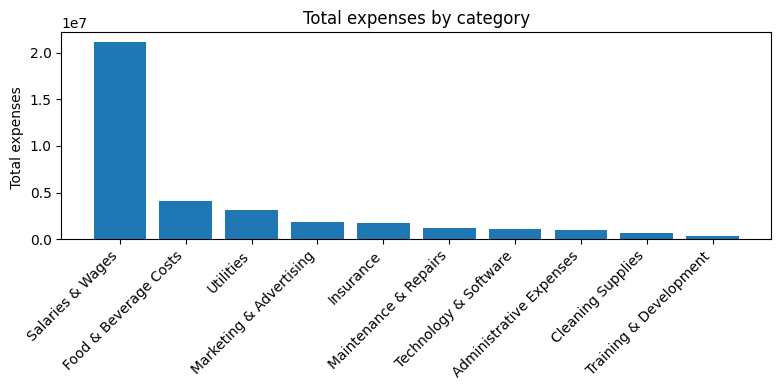

In [29]:
import matplotlib.pyplot as plt

# مصروفات حسب الفئة
plt.figure(figsize=(8,4))
exp_sorted = expenses_by_cat.sort_values("Amount", ascending=False)
plt.bar(exp_sorted["CategoryName"], exp_sorted["Amount"])
plt.xticks(rotation=45, ha="right")
plt.ylabel(" Total expenses  ")
plt.title("Total expenses by category")
plt.tight_layout()
plt.show()




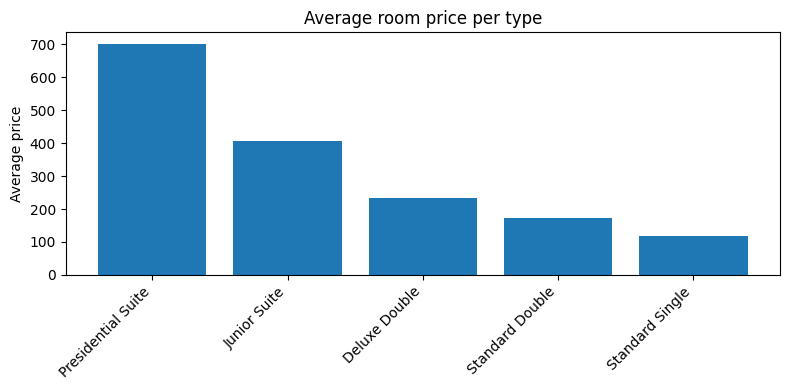

In [30]:
# متوسط سعر الليلة لكل نوع غرفة
plt.figure(figsize=(8,4))
avg_sorted = avg_price_type.sort_values("Price", ascending=False)
plt.bar(avg_sorted["TypeName"], avg_sorted["Price"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average price")
plt.title("Average room price per type")
plt.tight_layout()
plt.show()